In [ ]:
import cv2
from imageio import imread, imwrite
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray,gray2rgb,rgb2hsv
from PIL import Image, ImageChops
import scipy.ndimage
import scipy.interpolate

# Saliency

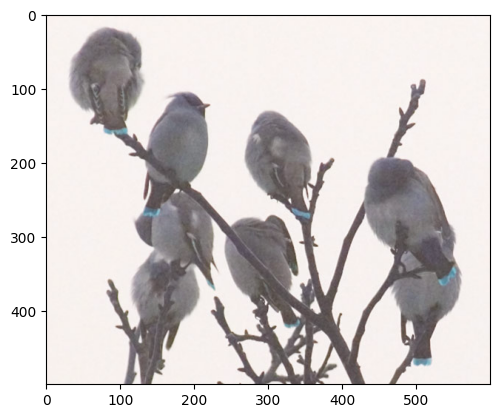

In [ ]:
main_img = cv2.imread("Birds.jpg")
plt.imshow(main_img)

True

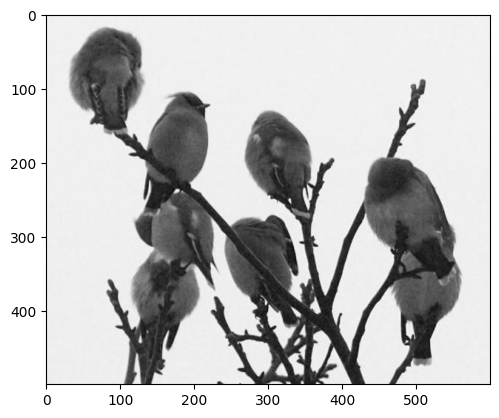

In [ ]:
gray_img = cv2.cvtColor(main_img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')
cv2.imwrite("gray image.jpg", gray_img)

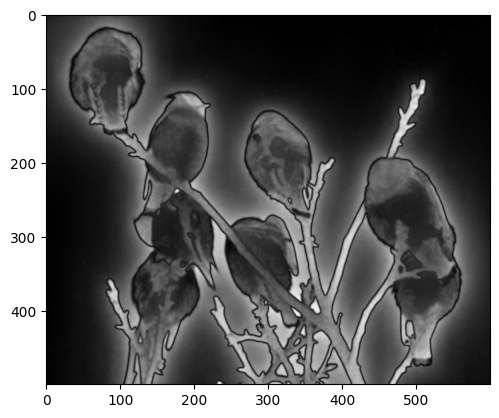

In [ ]:
saliency = cv2.saliency.StaticSaliencyFineGrained_create()
(success, saliencyMap) = saliency.computeSaliency(gray_img)
plt.imshow(saliencyMap, cmap='gray')

In [ ]:
main_img.shape

(500, 600, 3)

In [ ]:
saliencyMap = (saliencyMap * 255).astype(np.uint8)

In [ ]:
threshMap = cv2.threshold(saliencyMap, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

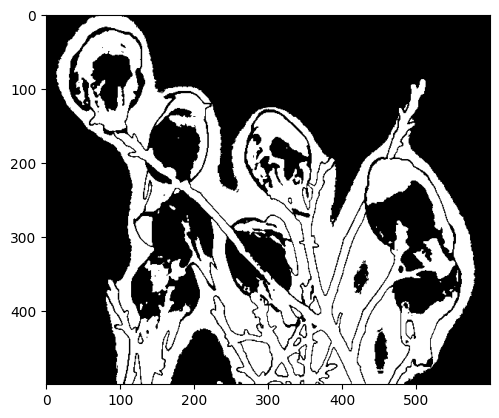

In [ ]:
plt.imshow(threshMap, cmap = "gray")

(array([3., 5., 4., 3., 0., 1., 1., 2., 0., 2., 0., 2., 2., 1., 0., 2., 0.,
        2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
        1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0.,
        0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 

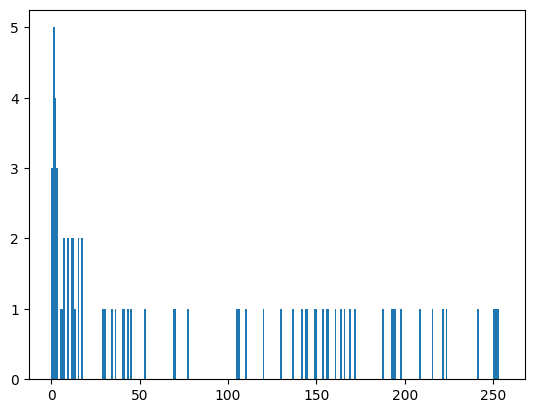

In [ ]:
### Another way
hist, bins = np.histogram(saliencyMap, 256)
plt.hist(hist, bins)

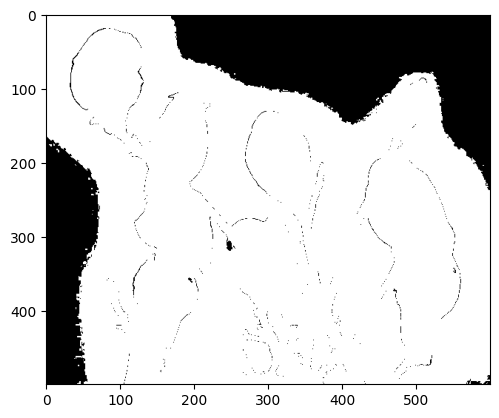

In [ ]:
binary_image = cv2.threshold(saliencyMap, 15, 255, cv2.THRESH_BINARY)[1]
plt.imshow(cv2.cvtColor(binary_image, cv2.COLOR_BGR2RGB))

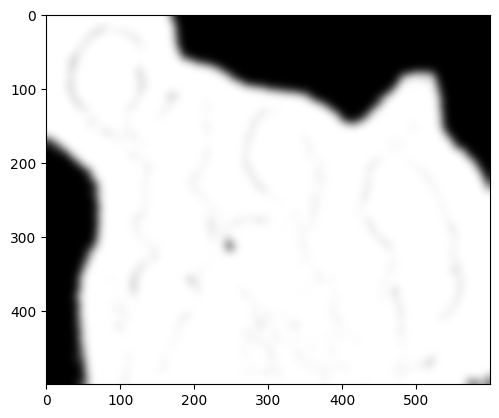

In [ ]:
blurred = cv2.GaussianBlur(binary_image, (39, 39),0)
plt.imshow(blurred, cmap='gray')

In [ ]:
cv2.imwrite("Mask.jpg", blurred)

True

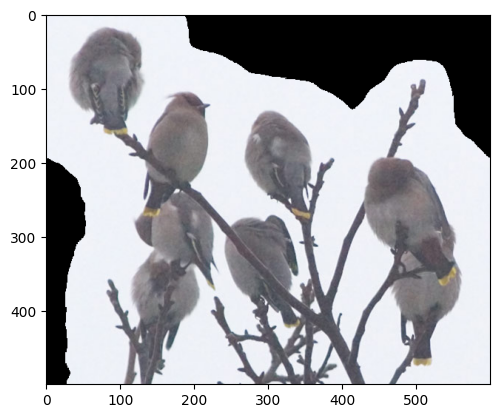

In [ ]:
saliency_obj=cv2.bitwise_and(main_img, main_img, mask=blurred)
plt.imshow(cv2.cvtColor(saliency_obj, cv2.COLOR_BGR2RGB))

In [ ]:
cv2.imwrite("extracted saliency image.jpg", saliency_obj)

True

In [ ]:
salient_copy = saliency_obj.copy()

In [ ]:
salient_copy[np.where((salient_copy == [0,0,0]).all(axis = 2))] = [255,255,255]

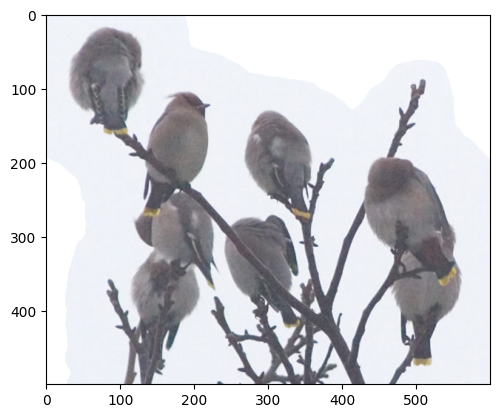

In [ ]:
img = Image.fromarray(salient_copy)
img = img.convert("RGBA")
datas = img.getdata()

newData = []
for item in datas:
    if item[0] == 255 and item[1] == 255 and item[2] == 255:
        newData.append((255, 255, 255, 0))
    else:
        newData.append(item)

img.putdata(newData)

plt.imshow(cv2.cvtColor(np.array(img), cv2.COLOR_BGR2RGB))

In [ ]:
imwrite("segmentedWhite.png",img)

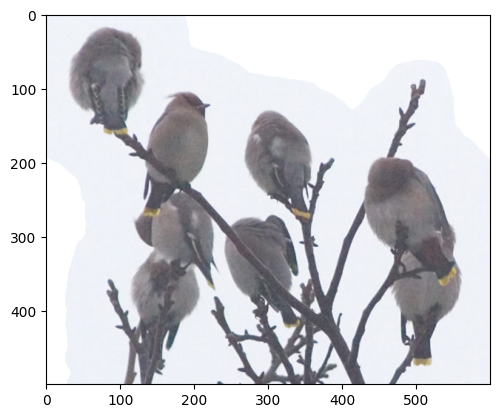

In [ ]:
salient_obj = cv2.imread("segmentedWhite.png")
plt.imshow(salient_obj)

In [ ]:
main_copy = main_img.copy()
for i in range(0, saliency_obj.shape[0]):
  for j in range (0, saliency_obj.shape[1]):
    if (saliency_obj[i][j] != 0).any():
      main_copy[i][j] = 255

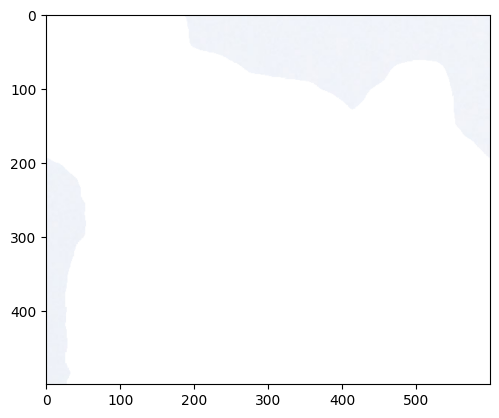

In [ ]:
plt.imshow(cv2.cvtColor(main_copy, cv2.COLOR_BGR2RGB))

In [ ]:
cv2.imwrite("Extracted Background.jpg", main_copy)

True

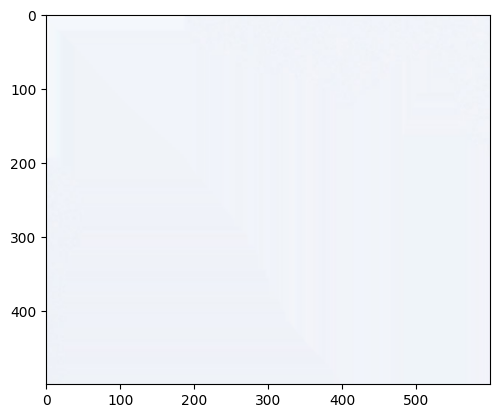

In [ ]:
inpainted = cv2.inpaint(main_copy,blurred,3,cv2.INPAINT_NS)

plt.imshow(cv2.cvtColor(inpainted, cv2.COLOR_BGR2RGB))

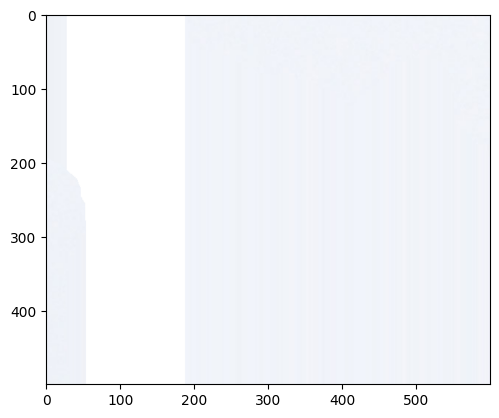

In [ ]:
for i in range (0, main_copy.shape[0]):
  for j in range (0, main_copy.shape[1]):
    if (main_copy[i][j] == 255).all():
      main_copy[i][j] = main_copy[i-1][j]
plt.imshow(cv2.cvtColor(main_copy, cv2.COLOR_BGR2RGB))

(500, 450, 3)


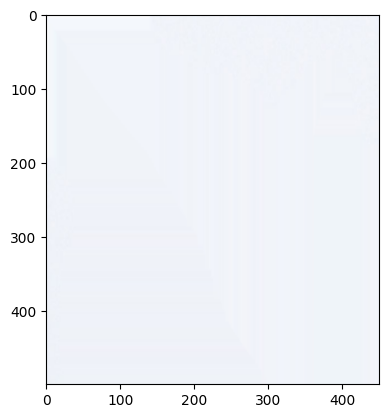

In [ ]:
# Resize background
resized_back = cv2.resize(inpainted, (450, 500))
plt.imshow(cv2.cvtColor(resized_back, cv2.COLOR_BGR2RGB))
cv2.imwrite("resized background.jpg", resized_back)
print(resized_back.shape)

In [ ]:
# RESIZING THE SALIENT OBJECT
mywidth = 450 #desired width

wpercent = (mywidth/float(salient_obj.shape[0]))
# hsize = 500
hsize = int((float(salient_obj.shape[1])*float(wpercent)))
image = cv2.resize(salient_obj, (mywidth,hsize), interpolation = cv2.INTER_AREA)

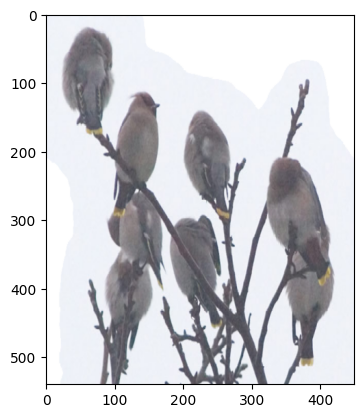

In [ ]:
plt.imshow(image)

In [ ]:
image.shape

(540, 450, 3)

In [ ]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
cv2.imwrite("resized salient.jpg", image)

True

In [ ]:
resized_back.shape

(500, 450, 3)

In [ ]:
top_bottom = int(image.shape[0]) - int(resized_back.shape[0])
top_bottom = top_bottom // 2
left_right = int(image.shape[1]) - int(resized_back.shape[1])
left_right = left_right // 2

padded_background = cv2.copyMakeBorder(resized_back, top_bottom, top_bottom, left_right, left_right, cv2.BORDER_CONSTANT, value=(255, 255, 255))

In [ ]:
padded_background.shape

(540, 450, 3)

In [ ]:
cv2.imwrite("padded background.jpg", padded_background)


True

In [ ]:
fin_background = cv2.imread("padded background.jpg")
fin_salient = cv2.imread("resized salient.jpg")

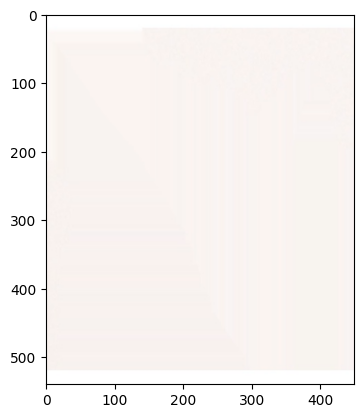

In [ ]:
plt.imshow(fin_background)

In [ ]:
fin_salient = cv2.cvtColor(fin_salient, cv2.COLOR_BGR2RGB)
fin_background = cv2.cvtColor(fin_background, cv2.COLOR_BGR2RGB)

In [ ]:
cen1 = int(fin_background.shape[0]) // 2
cen2 = int(fin_background.shape[1]) // 2

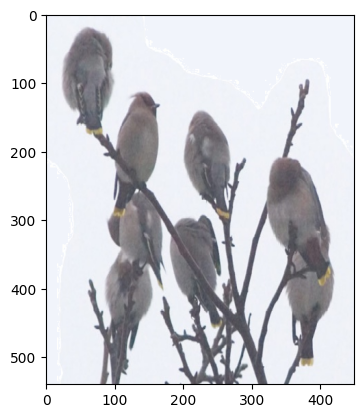

In [ ]:
for i in range(0, fin_background.shape[0]):
  for j in range (0, fin_background.shape[1]):
    if (fin_salient[i][j] == 255).all():
      fin_salient[i][j] = fin_background[cen1][cen2]

final = cv2.cvtColor(fin_salient, cv2.COLOR_BGR2RGB)
plt.imshow(cv2.cvtColor(final, cv2.COLOR_BGR2RGB))

In [ ]:
rescaled = cv2.resize(main_img, (600, 720))

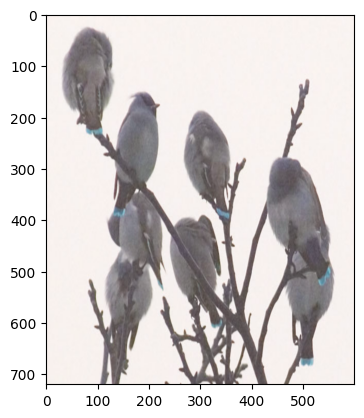

In [ ]:
plt.imshow(rescaled)

In [ ]:
resized_back.shape

(500, 450, 3)

In [ ]:
padded_background.shape

(540, 450, 3)

In [ ]:
start = int(padded_background.shape[0]) - int(resized_back.shape[0])
start = start // 2
end = int(padded_background.shape[0]) - start

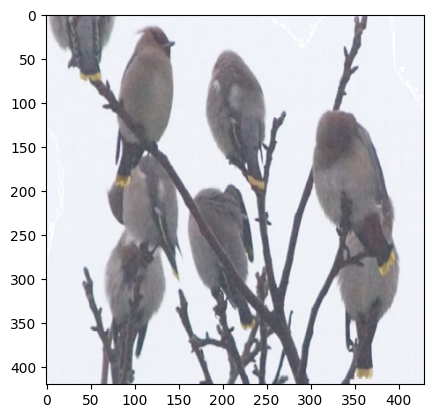

In [ ]:
final = final[start:end, :]
plt.imshow(cv2.cvtColor(final, cv2.COLOR_BGR2RGB))

In [ ]:
final.shape

(440, 430, 3)

In [ ]:
cv2.imwrite("FINAL.jpg", final)

True

In [ ]:
rescaled = cv2.resize(main_img, (450,500))

In [ ]:
rescaled.shape

(500, 450, 3)

True

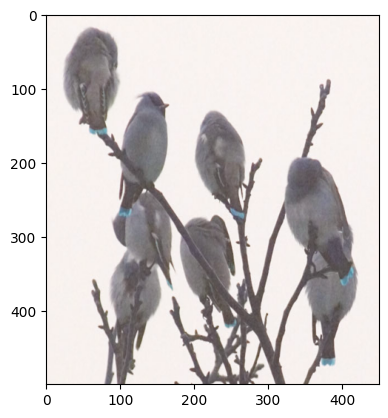

In [ ]:
plt.imshow(rescaled)
rescaled.shape
cv2.imwrite("rescaled.jpg", rescaled)